In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

In [35]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import keras
import tensorflow as tf

### Dataset: The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals). In machine learning projects, "HeartDisease" can be used as the explonatory variable.

In [37]:
df = pd.read_csv('/content/heart_2020.csv')

In [38]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [40]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


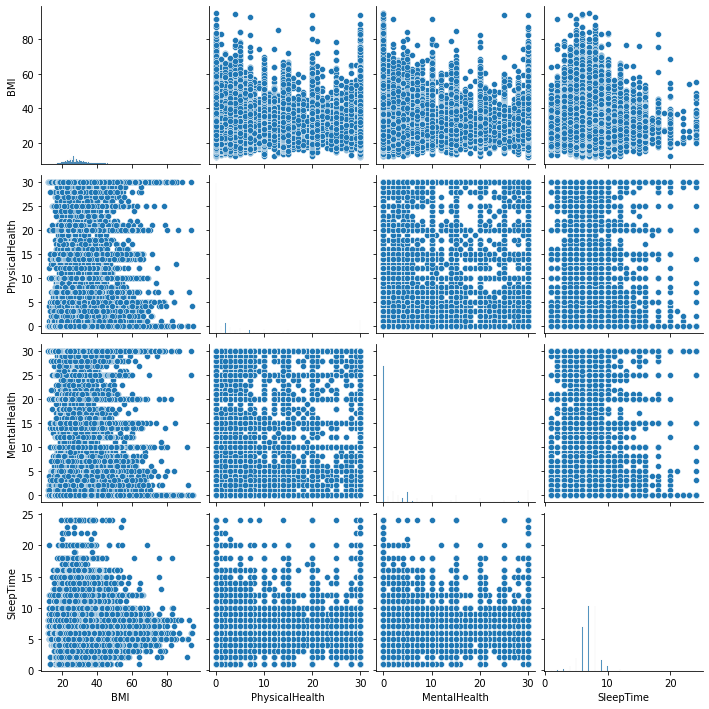

In [42]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff114629790>,
      dtype=object)

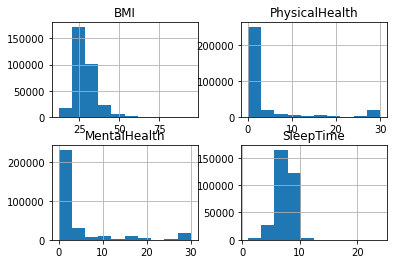

In [43]:
df.hist()

In [44]:
df.Diabetic.value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [45]:
df.Diabetic.replace(['No, borderline diabetes', 'No' , 'Yes','Yes (during pregnancy)'], [0,0,1,1], inplace=True)

In [46]:
df.Diabetic.value_counts()

0    276434
1     43361
Name: Diabetic, dtype: int64

In [47]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,Diabetic,SleepTime
BMI,1.000000,0.109788,0.064131,0.200443,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,0.153975,-0.061387
MentalHealth,0.064131,0.287987,1.000000,0.029709,-0.119717
Diabetic,0.200443,0.153975,0.029709,1.000000,0.003452
SleepTime,-0.051822,-0.061387,-0.119717,0.003452,1.000000


In [48]:
# We can see that BMI and Diabetes are correlated i.e. when BMI increases so does the diabetes in a person.

In [49]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,1,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,0,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,1,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,0,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,0,Yes,Very good,8.0,No,No,No


In [50]:
column_yesno = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "PhysicalActivity" , "Asthma" , "KidneyDisease" , "SkinCancer"]

In [51]:
df[column_yesno] = df[column_yesno].apply(lambda x: x.map({'Yes':1,'No':0}))
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [52]:
categoricals = df.select_dtypes(include=['object'])
categoricals.head()

,Sex,AgeCategory,Race,GenHealth
0,Female,55-59,White,Very good
1,Female,80 or older,White,Very good
2,Male,65-69,White,Fair
3,Female,75-79,White,Good
4,Female,40-44,White,Very good


In [53]:
cat_dummies = pd.get_dummies(categoricals, drop_first=True)
cat_dummies.head()

,Sex_Male,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [54]:
df.drop(list(categoricals.columns), axis=1, inplace=True)

In [55]:
df.shape

(319795, 14)

In [56]:
# concating df and dummies data frames.
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,0,1,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,0,1,0,0,0,1


In [57]:
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.174782,-0.100030,...,0.143041,-0.030262,-0.010156,-0.036163,-0.003039,0.040121,0.147954,0.039033,0.174662,-0.101886
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.200443,-0.150616,...,-0.094780,-0.078643,0.080672,0.023750,0.012535,-0.049060,0.127364,0.118047,0.062501,-0.065954
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.055544,-0.097174,...,0.013569,-0.060308,-0.038249,-0.066873,0.016205,0.072367,0.095620,0.059651,0.086520,-0.052305
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,-0.057786,0.017487,...,-0.045226,-0.022275,-0.025980,-0.015554,0.005455,0.033342,-0.018859,-0.007808,-0.017068,0.013005
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,0.104467,-0.079455,...,0.086099,-0.016060,0.024819,-0.025823,0.005743,0.001154,0.104983,0.013159,0.133641,-0.069395
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,0.153975,-0.232283,...,0.039621,-0.035229,0.011371,-0.005571,0.016102,-0.003968,0.303773,-0.037663,0.471919,-0.196462
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,0.029709,-0.095808,...,-0.071718,-0.023113,0.010944,0.011167,0.031385,-0.024489,0.151321,0.013353,0.192079,-0.089956
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,0.209255,-0.278524,...,0.156933,-0.038830,0.039615,-0.008214,0.008483,-0.015516,0.282517,0.031570,0.308767,-0.184986
Diabetic,0.174782,0.200443,0.055544,-0.057786,0.104467,0.153975,0.029709,0.209255,1.000000,-0.136599,...,0.043523,-0.012519,0.053722,0.007259,0.006349,-0.043658,0.175585,0.081214,0.135337,-0.116189
PhysicalActivity,-0.100030,-0.150616,-0.097174,0.017487,-0.079455,-0.232283,-0.095808,-0.278524,-0.136599,1.000000,...,-0.092533,0.012106,-0.043701,-0.056564,0.001808,0.064172,-0.174255,-0.072263,-0.174144,0.132472


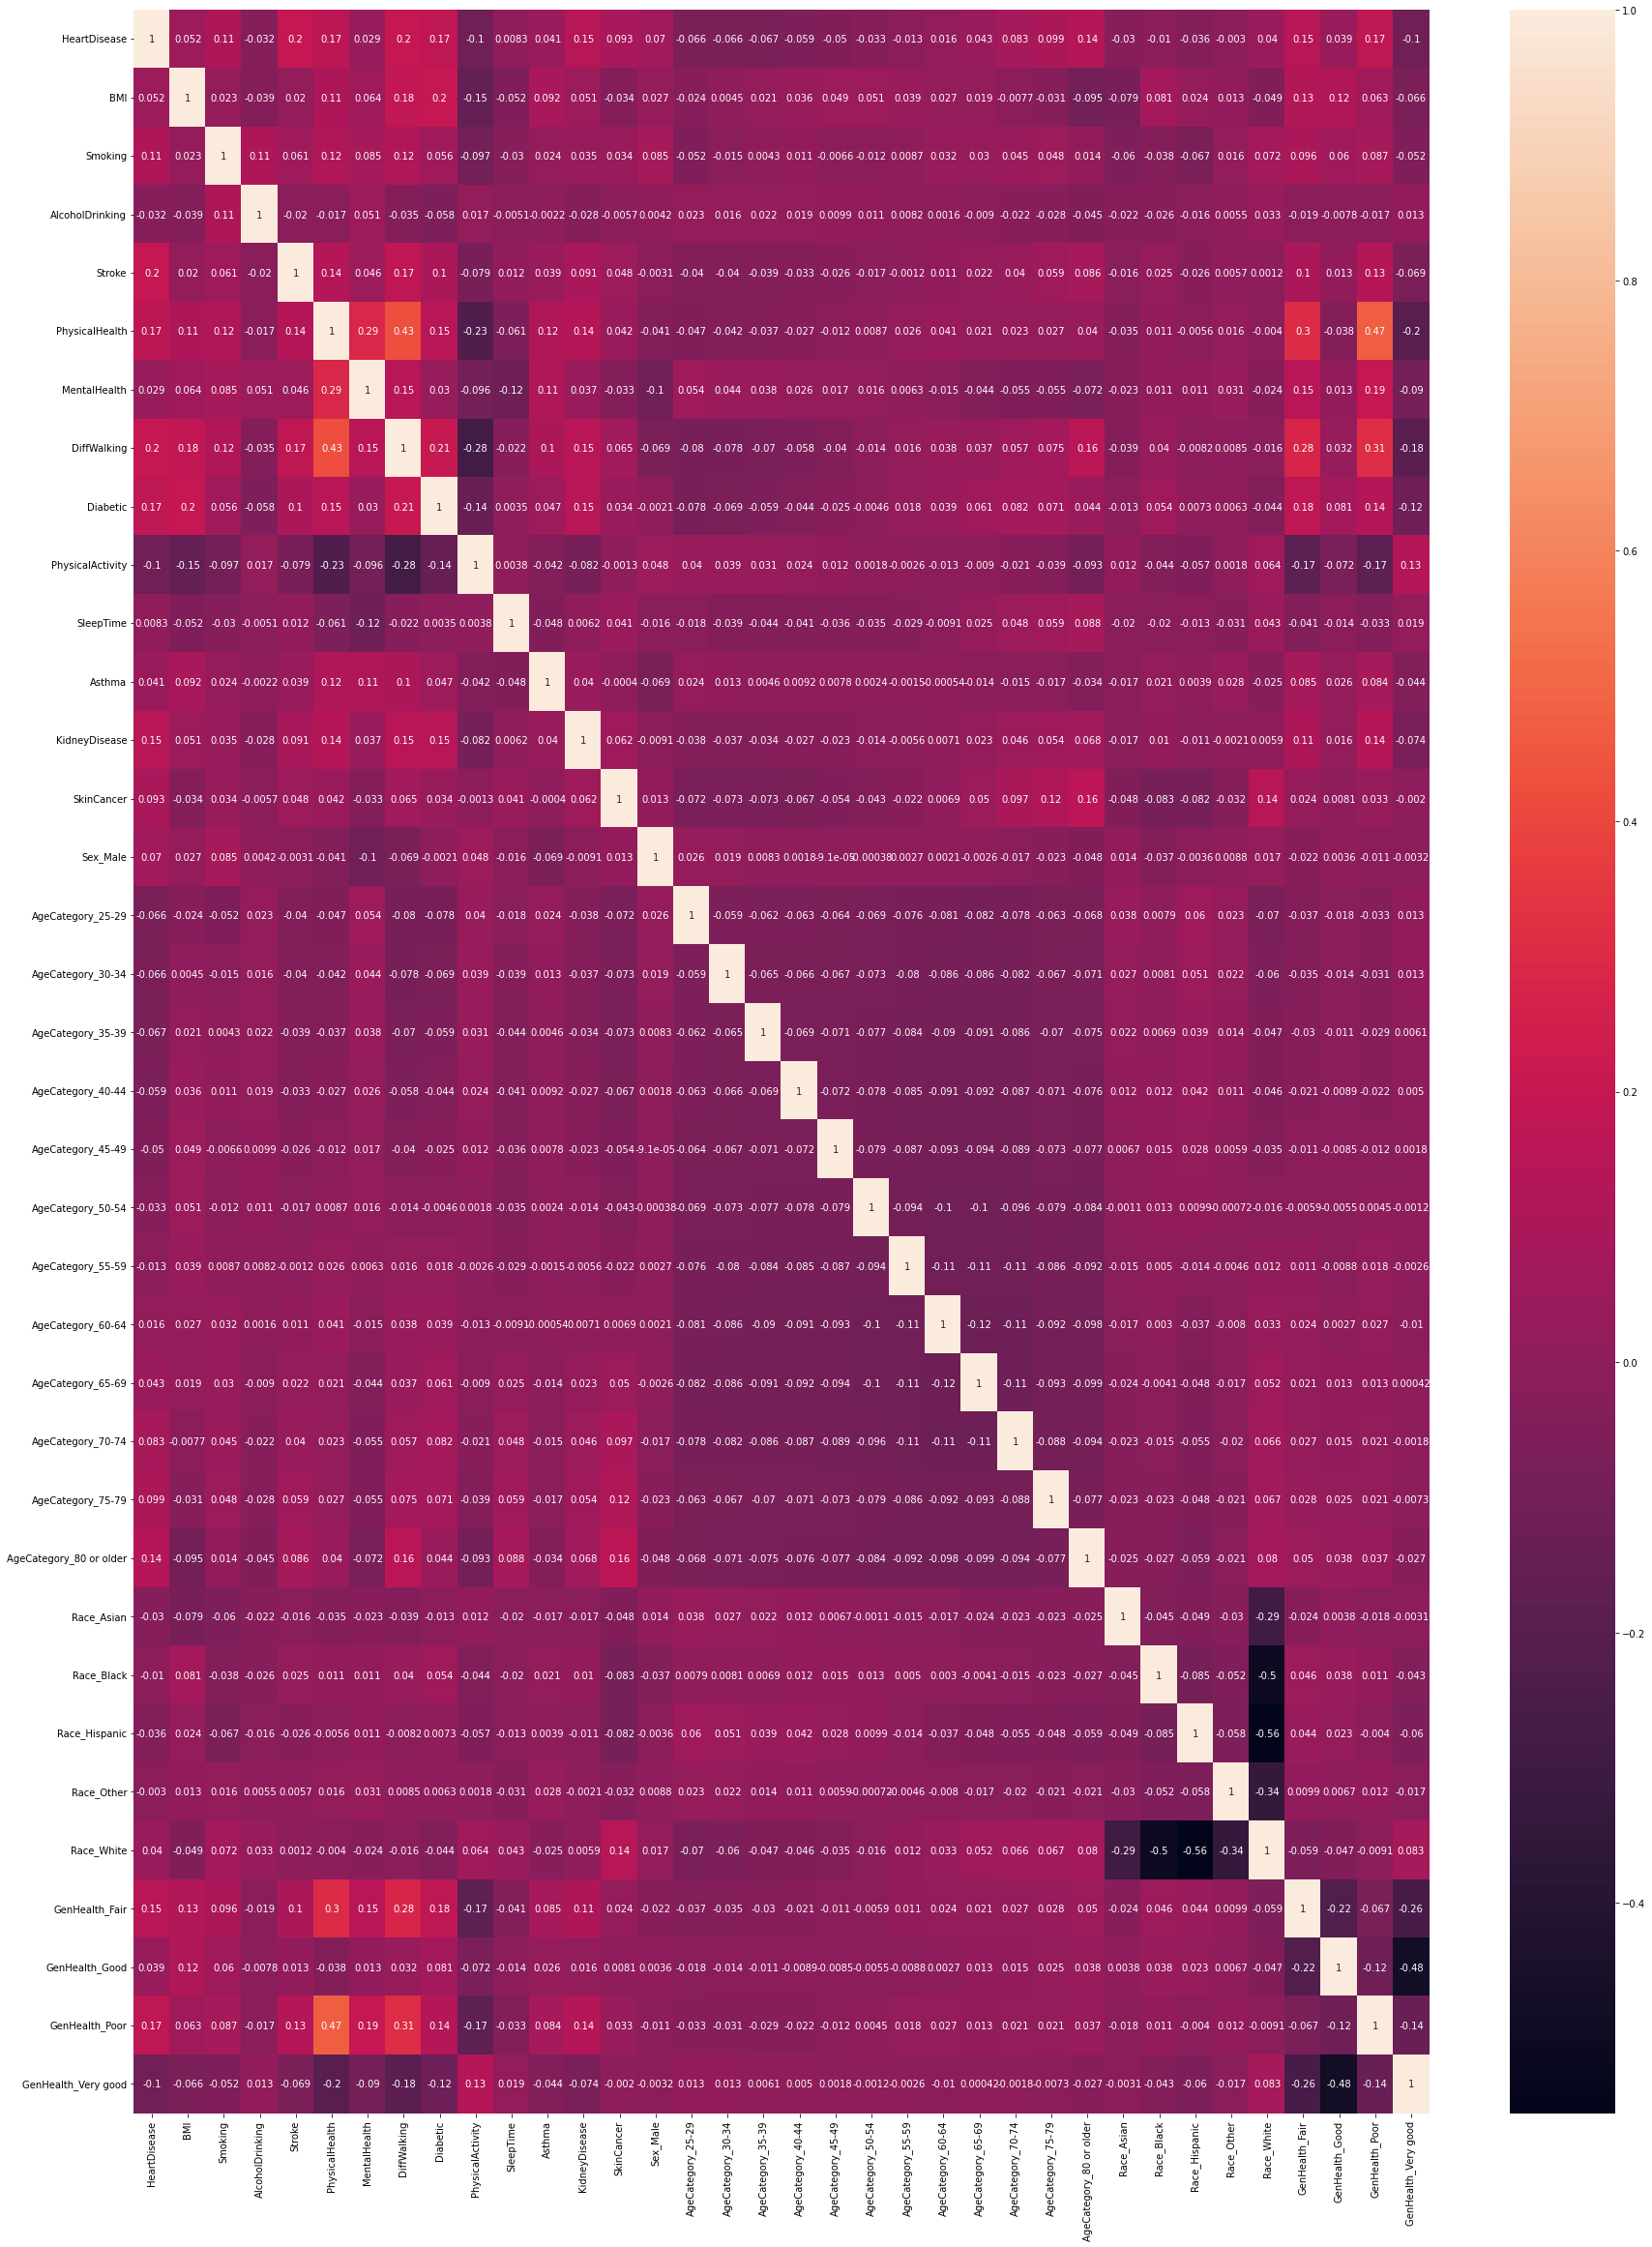

In [58]:
plt.figure(figsize = (30,40))
sns.heatmap(df.corr(),annot=True)

In [59]:
# People in the age category from 70 years to 80 or older have a higher chance of getting skin cancer.
# People with heart disease have a 10% (0.093) higher chance of getting skin cancer.
# People belonging to "White" race have 14% higher chance of getting skin cancer.

In [60]:
df['HeartDisease'].value_counts(normalize = True)

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64

In [61]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [62]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
from keras.models import Sequential
from keras.layers import Dense

In [65]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 24, activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 24, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
path = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=32)
print('Train score:', score)
print('Train accuracy:', acc)

25584/25584 [==============================] - 37s 1ms/step - loss: 0.2205 - accuracy: 0.9180
Train score: 0.22052699327468872
Train accuracy: 0.9180334210395813


In [71]:
# Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)


6396/6396 [==============================] - 10s 2ms/step - loss: 0.2328 - accuracy: 0.9134
Test score: 0.2327815294265747
Test accuracy: 0.9133663773536682


In [73]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[57870,   497],
       [ 5044,   548]])